Forum URL: https://forums.edmunds.com/discussion/8/general/x/car-commercials-the-good-the-bad-and-the-annoying

# Recognizing Brand & Models

In [1]:
import pandas as pd
import numpy as np

In [2]:
models = pd.read_csv('models.csv', header = None, names = ['Brand', 'Model'])

**Delete Duplicates**

In [3]:
models['Brand'] = models['Brand'].str.lower()
models['Model'] = models['Model'].str.lower()
models['Combined'] = (models['Brand'] + ' ' + models['Model'])
models['Combined'] = models['Combined'].str.replace('[\s\-,._]', '', regex = True)

unique_model = models.drop_duplicates(subset = 'Combined')
unique_model = unique_model.drop(columns = ['Combined'])

**Check Brand list**

In [4]:
brand = unique_model['Brand'].unique().tolist()
print(brand)

['acura', 'audi', 'bmw', 'buick', 'cadillac', 'car', 'chevrolet', 'chrysler', 'dodge', 'ford', 'honda', 'hyndai kia', 'hyundai', 'hyundai,', 'infiniti', 'kia', 'lincoln', 'mazda', 'mercedes', 'mercury', 'mitsubishi', 'nissan', 'nissan.', 'pontiac', 'problem', 'saturn', 'seat', 'sedan', 'subaru', 'suzuki', 'toyata', 'toyota', 'volkswagen', 'volkwagen', 'volvo']


**Notice weird brands:**

- _hyundai kia_, _car_, _problem_, _seat_ should be deleted
- _hyndai kia_ should be _hyundai_
- _hyundai,_ and _nissan._ should not have ',' and '.'.
- _toyata_ should be _toyota_
- _volkwagen_ should be _volkswagen_

In [5]:
new_model = unique_model[~unique_model['Brand'].isin(['hyundai kia', 'car', 'problem', 'seat'])]

new_model.loc[new_model['Brand'].str.contains('hyundai') & ~ new_model['Brand'].eq('hyundai'), 'Brand'] = 'hyundai'
new_model.loc[new_model['Brand'].str.contains('kia') & ~ new_model['Brand'].eq('kia'), 'Brand'] = 'kia'
new_model.loc[new_model['Brand'].str.contains('nissan') & ~ new_model['Brand'].eq('nissan'), 'Brand'] = 'nissan'
new_model.loc[new_model['Brand'].eq('toyata'), 'Brand'] = 'toyota'
new_model.loc[new_model['Brand'].eq('volkwagen'), 'Brand'] = 'volkswagen'

/var/folders/m4/wpp5ytyx7cx5d0jgdsbgt_3r0000gn/T/ipykernel_36745/1040335118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_model.loc[new_model['Brand'].str.contains('hyundai') & ~ new_model['Brand'].eq('hyundai'), 'Brand'] = 'hyundai'
/var/folders/m4/wpp5ytyx7cx5d0jgdsbgt_3r0000gn/T/ipykernel_36745/1040335118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_model.loc[new_model['Brand'].str.contains('kia') & ~ new_model['Brand'].eq('kia'), 'Brand'] = 'kia'
/var/folders/m4/wpp5ytyx7cx5d0jgdsbgt_3r0000gn/T/ipykernel_36745/1040335118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

**Delete Dup Again**

In [6]:
new_model['Combined'] = (new_model['Brand'] + ' ' + new_model['Model'])
new_model['Combined'] = new_model['Combined'].str.replace('[\s\-,._]', '', regex = True)

new_model = new_model.drop_duplicates(subset = 'Combined')
new_model = new_model.drop(columns = ['Combined'])

/var/folders/m4/wpp5ytyx7cx5d0jgdsbgt_3r0000gn/T/ipykernel_36745/354213253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_model['Combined'] = (new_model['Brand'] + ' ' + new_model['Model'])
/var/folders/m4/wpp5ytyx7cx5d0jgdsbgt_3r0000gn/T/ipykernel_36745/354213253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_model['Combined'] = new_model['Combined'].str.replace('[\s\-,._]', '', regex = True)


**Check brand**

In [7]:
brand_list = new_model['Brand'].unique().tolist()
print(brand_list)

['acura', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'honda', 'kia', 'hyundai', 'infiniti', 'lincoln', 'mazda', 'mercedes', 'mercury', 'mitsubishi', 'nissan', 'pontiac', 'saturn', 'sedan', 'subaru', 'suzuki', 'toyota', 'volkswagen', 'volvo']


In [8]:
model_list = new_model['Model'].unique().tolist()
print(model_list)

['integra', 'legend', 'vigor', 'rlx', 'ilx', 'mdx', 'rdx', 'tsx', 'rsx', 'quattro', 'a4', 'a6', 'a5', 'a7', 'q3', 'q5', 'q7', 'a8', 'a3', '3-series', '5-series', '6-series', '4-series', 'xdrive', 'alpina', '330ci', '328i', '330c', '335i', '335d', '528i', '535i', '128i', '640i', '3er', '5er', 'm5', 'm3', 'm6', 'bmws', 'bmwesque', 'park avenue', 'la crosse', 'century', 'enclave', 'encore', 'regal', 'buicks', 'escalade', 'srx', 'xts', 'grand blazer', 'trailblazer', 'silverado', 'colorado', 'corvette', 'suburban', 'cavalier', 'caprice', 'captiva', 'equinox', 'express', 'lacetti', 'montana', 'uplander', 'orlando', 'tornado', 'tracker', 'traverse', 'camaro', 'cobalt', 'impala', 'lumina', 'malibu', 'prisma', 'tavera', 'agile', 'celta', 'cruze', 'lanos', 'omega', 'optra', 'sonic', 'spark', 'tahoe', 'aveo', 'lova', 'n200', 'niva', 'onix', 's-10', 'sail', 'volt', 'chevy', 'malibus', 'town and country', 'chrysler 300', 'chrysler 200', 'pacifica', 'cruiser', 'sebring', '300m', 'lx', 'chryslers', '

**Check model**

In [9]:
print(len(new_model))
print(new_model['Model'].nunique())
duplicated_model = new_model[new_model.duplicated(subset = 'Model', keep = False)]
print("Rows with duplicate values in 'Model' column:")
print(duplicated_model)

481
478
Rows with duplicate values in 'Model' column:
       Brand    Model
1      acura   legend
44     buick  century
171    honda   legend
224  hyundai   matrix
420   toyota  century
444   toyota   matrix


**Modify model dup & create dictionary for models**

In [10]:
modify_rows = [1,44,171, 224, 420, 444]
new_model.loc[modify_rows, 'Model'] = new_model.loc[modify_rows, 'Brand'] + ' ' + new_model.loc[modify_rows, 'Model']
print(new_model['Model'].nunique())
model_dict = new_model.set_index('Model')['Brand'].to_dict()

481


# Load All Comments

In [11]:
comments = pd.read_csv('AllComments.csv', on_bad_lines='skip')

In [12]:
comments.head(3) # see what the comments look like

,User Name,Comment Date,Full Comment
0,bdreggors,June 2000,One of my current favorites is the Lexus IS c...
1,markz2k,June 2000,What's the deal with the Dog family in the Od...
2,roadroach,June 2000,The whole point of commercials is to get your...


In [13]:
comments.shape[0] # number of rows int the file

8050

**Note: some rows are skipped due to the formatting, but there are more than 5K lines of comments**

## Tokenization

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize

comments['Full Comment'] = comments['Full Comment'].apply(lambda x: str(x).lower())
comments['Sentences'] = comments['Full Comment'].apply(lambda x: sent_tokenize(str(x)))
comments['Words'] = comments['Full Comment'].apply(lambda x: word_tokenize(str(x)))

comments.head(3)

,User Name,Comment Date,Full Comment,Sentences,Words
0,bdreggors,June 2000,one of my current favorites is the lexus is c...,[ one of my current favorites is the lexus is ...,"[one, of, my, current, favorites, is, the, lex..."
1,markz2k,June 2000,what's the deal with the dog family in the od...,[ what's the deal with the dog family in the o...,"[what, 's, the, deal, with, the, dog, family, ..."
2,roadroach,June 2000,the whole point of commercials is to get your...,[ the whole point of commercials is to get you...,"[the, whole, point, of, commercials, is, to, g..."


# Recognizing Brand & Models

In [15]:
def extract_brands_models(words):
    brand_part = []
    model_part = []

    for word in words:
        if word in brand_list and word not in brand_part:
            brand_part.append(word)
        elif word in model_list and word not in model_part:
            model_part.append(word)

    return [brand_part, model_part]

comments['Contain Brand_Model'] = comments['Words'].apply(extract_brands_models)
comments.head(3)

,User Name,Comment Date,Full Comment,Sentences,Words,Contain Brand_Model
0,bdreggors,June 2000,one of my current favorites is the lexus is c...,[ one of my current favorites is the lexus is ...,"[one, of, my, current, favorites, is, the, lex...","[[toyota], []]"
1,markz2k,June 2000,what's the deal with the dog family in the od...,[ what's the deal with the dog family in the o...,"[what, 's, the, deal, with, the, dog, family, ...","[[], [accord]]"
2,roadroach,June 2000,the whole point of commercials is to get your...,[ the whole point of commercials is to get you...,"[the, whole, point, of, commercials, is, to, g...","[[toyota], [tundra]]"


## Recognize Unique Brand

In [16]:
def extract_unique_brands(brand_model_list):
    unique_brands = set()
    for brand in brand_model_list[0]:
        unique_brands.add(brand)
    for model in brand_model_list[1]:
        brand_from_dict = model_dict.get(model)
        if brand_from_dict not in unique_brands and brand_from_dict is not None:
            unique_brands.add(brand_from_dict)

    return list(unique_brands)

comments['Unique Brand'] = comments['Contain Brand_Model'].apply(extract_unique_brands)
comments.head(20)

,User Name,Comment Date,Full Comment,Sentences,Words,Contain Brand_Model,Unique Brand
0,bdreggors,June 2000,one of my current favorites is the lexus is c...,[ one of my current favorites is the lexus is ...,"[one, of, my, current, favorites, is, the, lex...","[[toyota], []]",[toyota]
1,markz2k,June 2000,what's the deal with the dog family in the od...,[ what's the deal with the dog family in the o...,"[what, 's, the, deal, with, the, dog, family, ...","[[], [accord]]",[honda]
2,roadroach,June 2000,the whole point of commercials is to get your...,[ the whole point of commercials is to get you...,"[the, whole, point, of, commercials, is, to, g...","[[toyota], [tundra]]",[toyota]
3,markz2k,June 2000,"yeah, i agree the point is to get your attent...","[ yeah, i agree the point is to get your atten...","[yeah, ,, i, agree, the, point, is, to, get, y...","[[honda], [tundra, accord]]","[toyota, honda]"
4,bdreggors,June 2000,i've noticed two fallicies in hodna commercia...,[ i've noticed two fallicies in hodna commerci...,"[i, 've, noticed, two, fallicies, in, hodna, c...","[[honda], [accord, accords, civic]]",[honda]
5,floridian,June 2000,the camry commercial that says over and over ...,[ the camry commercial that says over and over...,"[the, camry, commercial, that, says, over, and...","[[], [camry]]",[toyota]
6,fezo,June 2000,absolutely! next chevy will advertise sexy ma...,"[ absolutely!, next chevy will advertise sexy ...","[absolutely, !, next, chevy, will, advertise, ...","[[], [chevy, malibus]]",[chevrolet]
7,bdreggors,June 2000,that's an oxymoron,[ that's an oxymoron],"[that, 's, an, oxymoron]","[[], []]",[]
8,microrepair,June 2000,is totally irritated by those toyotathon comm...,[ is totally irritated by those toyotathon com...,"[is, totally, irritated, by, those, toyotathon...","[[toyota], [tundra]]",[toyota]
9,andrew21,June 2000,"...the new ""zoom zoom zoom"" campaign by toyot...","[ ...the new ""zoom zoom zoom"" campaign by toyo...","[..., the, new, ``, zoom, zoom, zoom, '', camp...","[[toyota, bmw], []]","[toyota, bmw]"


## Frequency of Brand Mentions

In [17]:
brand_in_comments = [brand for brands_list in comments['Unique Brand'] for brand in brands_list if brand]

unique_brand_count = {}
for i in brand_in_comments:
    if i not in unique_brand_count:
        unique_brand_count[i] = 0
    else:
        pass
    unique_brand_count[i] += 1

brand_count_df = pd.DataFrame(list(unique_brand_count.items()), columns=['Brand', 'Count']).sort_values(by='Count', ascending=False)
brand_count_df.head(10)

,Brand,Count
0,toyota,897
1,honda,558
4,ford,506
2,chevrolet,480
5,volkswagen,408
13,hyundai,350
11,subaru,296
6,nissan,267
3,bmw,258
10,mercedes,246


# Task A

## Identify top 10 brands by frequency

In [18]:
top10brand = brand_count_df['Brand'].head(10).tolist()
top10brand

['toyota',
 'honda',
 'ford',
 'chevrolet',
 'volkswagen',
 'hyundai',
 'subaru',
 'nissan',
 'bmw',
 'mercedes']

In [19]:
filter_comments = comments[comments['Unique Brand'].apply(lambda x: any(brand in top10brand for brand in x))]
filter_comments.head(15)

,User Name,Comment Date,Full Comment,Sentences,Words,Contain Brand_Model,Unique Brand
0,bdreggors,June 2000,one of my current favorites is the lexus is c...,[ one of my current favorites is the lexus is ...,"[one, of, my, current, favorites, is, the, lex...","[[toyota], []]",[toyota]
1,markz2k,June 2000,what's the deal with the dog family in the od...,[ what's the deal with the dog family in the o...,"[what, 's, the, deal, with, the, dog, family, ...","[[], [accord]]",[honda]
2,roadroach,June 2000,the whole point of commercials is to get your...,[ the whole point of commercials is to get you...,"[the, whole, point, of, commercials, is, to, g...","[[toyota], [tundra]]",[toyota]
3,markz2k,June 2000,"yeah, i agree the point is to get your attent...","[ yeah, i agree the point is to get your atten...","[yeah, ,, i, agree, the, point, is, to, get, y...","[[honda], [tundra, accord]]","[toyota, honda]"
4,bdreggors,June 2000,i've noticed two fallicies in hodna commercia...,[ i've noticed two fallicies in hodna commerci...,"[i, 've, noticed, two, fallicies, in, hodna, c...","[[honda], [accord, accords, civic]]",[honda]
5,floridian,June 2000,the camry commercial that says over and over ...,[ the camry commercial that says over and over...,"[the, camry, commercial, that, says, over, and...","[[], [camry]]",[toyota]
6,fezo,June 2000,absolutely! next chevy will advertise sexy ma...,"[ absolutely!, next chevy will advertise sexy ...","[absolutely, !, next, chevy, will, advertise, ...","[[], [chevy, malibus]]",[chevrolet]
8,microrepair,June 2000,is totally irritated by those toyotathon comm...,[ is totally irritated by those toyotathon com...,"[is, totally, irritated, by, those, toyotathon...","[[toyota], [tundra]]",[toyota]
9,andrew21,June 2000,"...the new ""zoom zoom zoom"" campaign by toyot...","[ ...the new ""zoom zoom zoom"" campaign by toyo...","[..., the, new, ``, zoom, zoom, zoom, '', camp...","[[toyota, bmw], []]","[toyota, bmw]"
10,roadroach,June 2000,i'm starting to get a little irritated by the...,[ i'm starting to get a little irritated by th...,"[i, 'm, starting, to, get, a, little, irritate...","[[], [chevy]]",[chevrolet]


In [20]:
filter_comments.to_csv("filteredComments.csv", index=False)

## Lift ratios for associations between brands

**Set up matrix**

In [21]:
import numpy as np
brand_matrix = pd.DataFrame(np.zeros((len(top10brand), len(top10brand)), dtype=int), index=top10brand, columns=top10brand)
brand_matrix

,toyota,honda,ford,chevrolet,volkswagen,hyundai,subaru,nissan,bmw,mercedes
toyota,0,0,0,0,0,0,0,0,0,0
honda,0,0,0,0,0,0,0,0,0,0
ford,0,0,0,0,0,0,0,0,0,0
chevrolet,0,0,0,0,0,0,0,0,0,0
volkswagen,0,0,0,0,0,0,0,0,0,0
hyundai,0,0,0,0,0,0,0,0,0,0
subaru,0,0,0,0,0,0,0,0,0,0
nissan,0,0,0,0,0,0,0,0,0,0
bmw,0,0,0,0,0,0,0,0,0,0
mercedes,0,0,0,0,0,0,0,0,0,0


**Calculate Brand Frequency Matrix**

In [22]:
for unique_brands_list in comments['Unique Brand']:
    valid_brands = [brand for brand in unique_brands_list if brand in top10brand]

    for i in range(len(valid_brands)):
        for j in range(i, len(valid_brands)):
            brand_matrix.at[valid_brands[i], valid_brands[j]] += 1
            if i != j:
                brand_matrix.at[valid_brands[j], valid_brands[i]] += 1

brand_matrix

,toyota,honda,ford,chevrolet,volkswagen,hyundai,subaru,nissan,bmw,mercedes
toyota,897,151,102,65,56,45,58,67,28,24
honda,151,558,72,51,64,35,45,49,21,23
ford,102,72,506,86,29,17,33,32,24,18
chevrolet,65,51,86,480,29,15,26,29,19,14
volkswagen,56,64,29,29,408,31,26,21,16,14
hyundai,45,35,17,15,31,350,11,16,12,18
subaru,58,45,33,26,26,11,296,18,20,15
nissan,67,49,32,29,21,16,18,267,13,8
bmw,28,21,24,19,16,12,20,13,258,34
mercedes,24,23,18,14,14,18,15,8,34,246


In [23]:
probability_matrix = brand_matrix / brand_matrix.sum().sum()

lift_ratio_matrix = pd.DataFrame(index=brand_matrix.index, columns=brand_matrix.columns)

for brand_i in brand_matrix.index:
    for brand_j in brand_matrix.columns:
        lift_ratio_matrix.at[brand_i, brand_j] = probability_matrix.at[brand_i, brand_j] / (probability_matrix.at[brand_i, brand_i] * probability_matrix.at[brand_j, brand_j])

lift_ratio_matrix

,toyota,honda,ford,chevrolet,volkswagen,hyundai,subaru,nissan,bmw,mercedes
toyota,8.3233,2.252363,1.677819,1.127114,1.142414,1.070139,1.630917,2.088618,0.903304,0.812029
honda,2.252363,13.379928,1.903863,1.421617,2.098812,1.337993,2.034111,2.455492,1.089064,1.250969
ford,1.677819,1.903863,14.754941,2.643594,1.048758,0.716669,1.644976,1.768382,1.372553,1.07963
chevrolet,1.127114,1.421617,2.643594,15.554167,1.105566,0.666607,1.366244,1.689404,1.145462,0.885196
volkswagen,1.142414,2.098812,1.048758,1.105566,18.29902,1.62077,1.607346,1.439249,1.134823,1.041408
hyundai,1.070139,1.337993,0.716669,0.666607,1.62077,21.331429,0.792722,1.278288,0.992159,1.560836
subaru,1.630917,2.034111,1.644976,1.366244,1.607346,0.792722,25.222973,1.700425,1.955269,1.537986
nissan,2.088618,2.455492,1.768382,1.689404,1.439249,1.278288,1.700425,27.962547,1.408966,0.909351
bmw,0.903304,1.089064,1.372553,1.145462,1.134823,0.992159,1.955269,1.408966,28.937984,3.999559
mercedes,0.812029,1.250969,1.07963,0.885196,1.041408,1.560836,1.537986,0.909351,3.999559,30.349593


## Brands on MDS map

In [24]:
dissimilarity_matrix = 1 / lift_ratio_matrix
dissimilarity_matrix

,toyota,honda,ford,chevrolet,volkswagen,hyundai,subaru,nissan,bmw,mercedes
toyota,0.120145,0.443978,0.596012,0.887222,0.87534,0.934458,0.613152,0.478785,1.107047,1.231483
honda,0.443978,0.074739,0.525248,0.703424,0.47646,0.747388,0.491615,0.40725,0.91822,0.79938
ford,0.596012,0.525248,0.067774,0.378273,0.953509,1.395345,0.607911,0.565489,0.72857,0.926243
chevrolet,0.887222,0.703424,0.378273,0.064291,0.904514,1.500134,0.731933,0.591925,0.87301,1.129693
volkswagen,0.87534,0.47646,0.953509,0.904514,0.054648,0.616991,0.622143,0.694807,0.881195,0.960239
hyundai,0.934458,0.747388,1.395345,1.500134,0.616991,0.046879,1.261476,0.782296,1.007902,0.640682
subaru,0.613152,0.491615,0.607911,0.731933,0.622143,1.261476,0.039646,0.588088,0.511439,0.650201
nissan,0.478785,0.40725,0.565489,0.591925,0.694807,0.782296,0.588088,0.035762,0.709741,1.099685
bmw,1.107047,0.91822,0.72857,0.87301,0.881195,1.007902,0.511439,0.709741,0.034557,0.250028
mercedes,1.231483,0.79938,0.926243,1.129693,0.960239,0.640682,0.650201,1.099685,0.250028,0.032949


/Users/xinyi/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


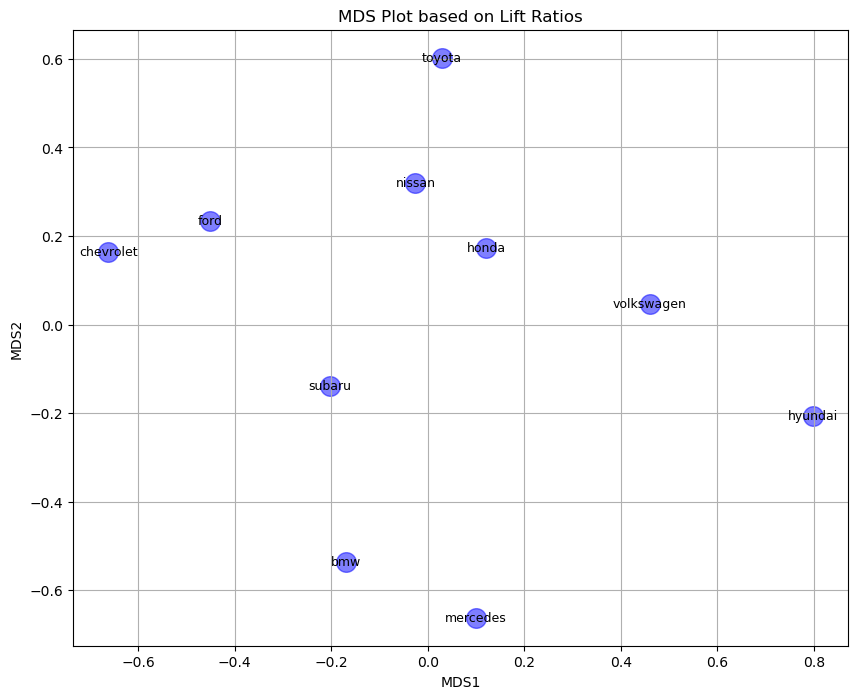

In [25]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt


mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_result = mds.fit_transform(dissimilarity_matrix)

mds_df = pd.DataFrame(mds_result, columns=['MDS1', 'MDS2'], index=lift_ratio_matrix.index)

plt.figure(figsize=(10, 8))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'], s=200, color='blue', alpha=0.5)

for brand, (x, y) in mds_df.iterrows():
    plt.text(x, y, brand, fontsize=9, ha='center', va='center')

plt.title('MDS Plot based on Lift Ratios')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.grid(True)
plt.show()

# Task B

What insights can you offer brand managers from your analysis in Task A? Choose two brands that you can offer the most interesting/useful insights for.

General Insights:

- Collaboration opportunities: Brands with strong lift ratios can look into cross-promotional opportunities for products or services. Toyota, for example, may consider collaborating with companies such as Honda or Nissan to develop collaborative marketing efforts that benefit both sides.
- Targeted marketing strategies: Brands with lesser dissimilarity may profit from targeted marketing strategies that emphasise common values or traits with other brands in the vicinity. Volkswagen, for example, may consider collaborating with companies such as Hyundai or Subaru to target specific market niches.
- Competitive analysis: Brand managers can better grasp their brand's competitive positioning by analysing dissimilarity and lift ratios. Brands having both good connections and a distinct positioning have a competitive edge in terms of adaptability and distinctiveness.


Two Brands:

- Toyota: Toyota has the highest co-occurrence with other brands, showing that it is highly visible and popular in the market. However, the lift ratios with other brands are often low, implying that the co-occurrences are more likely attributable to Toyota's overall popularity than a strong relationship with other brands. This is further confirmed by the high values in the dissimilarity matrix, which show that Toyota is frequently cited independently of other brands. Toyota also features a reasonably high lift ratio compared to Honda, although not as high as Ford or Nissan. This implies that Toyota and Honda are frequently referenced together more than would be expected if they were independent, potentially indicating a significant market association or direct competition. Toyota's brand managers can use these insights to exploit the company's strong independent presence and market popularity. They might concentrate on techniques that highlight Toyota's distinguishing features and set it apart from brands such as Honda, with which it has a strong relationship. At the same time, understanding the context of these linkages is critical to ensuring that they are beneficial and may be leveraged for future partnerships or collaborative marketing initiatives.
- Volkswagen: Volkswagen has a moderate amount of co-occurrence with other brands, suggesting its market presence. However, the lift ratios with other brands are often low, implying that co-occurrences are more likely attributable to Volkswagen's total market presence than a strong relationship with other brands. This is further corroborated by the high values in the dissimilarity matrix, which show that Volkswagen is frequently cited independently of other brands. In addition, Volkswagen and Honda have a significantly high lift ratio, indicating a strong market relationship or direct competition. This could imply that people frequently compare Volkswagen and Honda, or consider them jointly. Moreover, Volkswagen significantly differs from other brands, indicating a separate market sector or unique customer attitudes. This uniqueness can be a powerful tool for brand managers. They can develop advertising strategies that highlight Volkswagen’s distinguishing traits or target a specific audience, further solidifying its unique position in the market.

# Task C

What are the 5 most frequently mentioned attributes of cars in the discussions? Note that the same attribute may be described by different words – e.g., pick-up and acceleration may both refer to a more general attribute, “performance”. You have to make suitable replacements. Now pick the 5 most frequently mentioned brands. Which attributes are most strongly associated with which of these 5 brands?

In [26]:
# Using comments dataframe since we would like to analyze the attributes of all comments
comments.head()

,User Name,Comment Date,Full Comment,Sentences,Words,Contain Brand_Model,Unique Brand
0,bdreggors,June 2000,one of my current favorites is the lexus is c...,[ one of my current favorites is the lexus is ...,"[one, of, my, current, favorites, is, the, lex...","[[toyota], []]",[toyota]
1,markz2k,June 2000,what's the deal with the dog family in the od...,[ what's the deal with the dog family in the o...,"[what, 's, the, deal, with, the, dog, family, ...","[[], [accord]]",[honda]
2,roadroach,June 2000,the whole point of commercials is to get your...,[ the whole point of commercials is to get you...,"[the, whole, point, of, commercials, is, to, g...","[[toyota], [tundra]]",[toyota]
3,markz2k,June 2000,"yeah, i agree the point is to get your attent...","[ yeah, i agree the point is to get your atten...","[yeah, ,, i, agree, the, point, is, to, get, y...","[[honda], [tundra, accord]]","[toyota, honda]"
4,bdreggors,June 2000,i've noticed two fallicies in hodna commercia...,[ i've noticed two fallicies in hodna commerci...,"[i, 've, noticed, two, fallicies, in, hodna, c...","[[honda], [accord, accords, civic]]",[honda]


In [27]:
comments_alt = comments.copy()

In [28]:
attributes=['good mileage','belt','alternator','drain','warm','daughter','starter','resales','heater','price advantage','old engine','powertrain warranty','best-selling car',
          'no oil','plastic interior','interior parts','highway mileage','plastic parts','cargo capacity','labor cost','junk','oxygen sensor','bad mileage','engine lights','mom',
          'model car','first car','MPG','warning lights','transmission fluid','no noise','safety equipment','environment','running lights','revving engine','hose','stereotype','Edmunds reviews',
          'fleet sales','ABS brakes','airflow sensor','catalytic converter','Pro','ABS','spark','smell','advertised price','economy','small car','sub-compact','compact','standard transmission',
          'damage','cheap cars','crash safety','rust','fuel filter','discont price','emergency brakes','distributor','parking-brakes','fuel cost','RPM','roomy','good power','floor','financing','convenience',
          'break-in period','compressor','disc brakes','mat','fire','horn','powerful car','car reviews','alloy','steel wheel','sedan segment','traffic safety','bolt','college','drive wheel','keyless',
          'San Diego','oil pan','performance driving','right price','last car','big tires','airbag lights','import car','performance package','door price','synthetic oil','car segment','LA AutoShow',
          'bumper-to-bumper warranty','oil pressure','sport compact','manual car','oil consumption','engine oil','secutity system','engine RPM','oil filter','commuter car','VTEC engine','hatch-back',
          'over MSRP','no A/C','oil level','aftermarkets parts','OTD price','internet sales','suspension noise','check oil','mud guards','motor oil','full warranty','speedometer','muffler','total price','coupe',
          'destination charge','change filter','current price','bad deal','TMV price','alarm','insurance','hybrid','stock wheel','oil','car engine','side door','Bridgestone tires','low power','fee','sales tax',
          'A/C','power door']

In [34]:
import tensorflow_hub as hub
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Generate embeddings for each phrase
embeddings = embed(attributes)

2024-01-30 18:45:37.166539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:
# Apply K-means clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embeddings)

# Get cluster labels
labels = kmeans.labels_

clusters = []
# Print out the clusters
for i in range(n_clusters):
    word_bag = []
    print(f"\nCluster {i}:")
    for j in range(len(labels)):
        if labels[j] == i:
            print(attributes[j])
            word_bag.append(attributes[j])
    clusters.append(word_bag)

/Users/xinyi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Cluster 0:
warning lights
safety equipment
crash safety
emergency brakes
traffic safety
airbag lights
change filter
alarm

Cluster 1:
old engine
oxygen sensor
engine lights
no noise
revving engine
airflow sensor
catalytic converter
RPM
compressor
engine RPM
VTEC engine
suspension noise
muffler

Cluster 2:
best-selling car
model car
first car
Edmunds reviews
small car
sub-compact
compact
cheap cars
powerful car
car reviews
sedan segment
last car
import car
car segment
sport compact
manual car
commuter car
hatch-back
car engine

Cluster 3:
price advantage
cargo capacity
labor cost
advertised price
discont price
fuel cost
financing
right price
performance package
door price
over MSRP
aftermarkets parts
OTD price
total price
destination charge
current price
TMV price
fee

Cluster 4:
belt
alternator
starter
plastic interior
interior parts
plastic parts
running lights
distributor
horn
bolt
keyless
mud guards
coupe
hybrid
side door
low power
power door

Cluster 5:
good mileage
highway mileag

In [36]:
Attributes = {"Engine Lubrication System": clusters[0], 
              "Engine Components": clusters[1], 
              "Vehicle Types": clusters[2],
              "Personal and Environmental Demographics": clusters[3], 
              "Engine Performance": clusters[4], 
              "Vehicle Design": clusters[5], 
              "Driving Experience": clusters[6], 
              "Vehicle Pricing and Costs": clusters[7], 
              "Vehicle Warranties and Insurance": clusters[8], 
              "Vehicle Safety Systems": clusters[9]}

In [37]:
Attributes_count = {}
for key in Attributes.keys():
    Attributes_count[key] = 0
Attributes_count

{'Engine Lubrication System': 0,
 'Engine Components': 0,
 'Vehicle Types': 0,
 'Personal and Environmental Demographics': 0,
 'Engine Performance': 0,
 'Vehicle Design': 0,
 'Driving Experience': 0,
 'Vehicle Pricing and Costs': 0,
 'Vehicle Warranties and Insurance': 0,
 'Vehicle Safety Systems': 0}

In [38]:
full_comments = comments_alt["Full Comment"].copy()
for attribute in Attributes.keys():
    for word in Attributes[attribute]:
        for i in range(full_comments.shape[0]):
            if word in full_comments[i]:
                Attributes_count[attribute] += 1

In [39]:
Attributes_count

{'Engine Lubrication System': 6,
 'Engine Components': 4,
 'Vehicle Types': 85,
 'Personal and Environmental Demographics': 287,
 'Engine Performance': 245,
 'Vehicle Design': 60,
 'Driving Experience': 1655,
 'Vehicle Pricing and Costs': 21,
 'Vehicle Warranties and Insurance': 24,
 'Vehicle Safety Systems': 87}

In [40]:
top5brand = top10brand[:5]
top5brand

['toyota', 'honda', 'ford', 'chevrolet', 'volkswagen']

Top 5 attributes: Engine Components, Personal and Environmental Demographics, Vehicle Pricing and Costs, Vehicle Design, Vehicle Types \
Top 5 Brands: Toyota, Honda, Ford, Chevrolet, Volkswagen

In [41]:
attribute_brand_association = pd.DataFrame(np.zeros((5, 5)))
attribute_brand_association.index = ["Engine Components", "Personal and Environmental Demographics", 
                                       "Vehicle Pricing and Costs", "Vehicle Design", "Vehicle Types"]
attribute_brand_association.columns = ['toyota', 'honda', 'ford', 'chevrolet', 'volkswagen']

In [42]:
comments_alt.loc[1, "Unique Brand"]

['honda']

In [43]:
# Engine Components
for word in Attributes["Engine Components"]:
    for i in range(comments_alt.shape[0]):
        if word in comments_alt.loc[i, "Full Comment"]:
            for brand in top5brand:
                if brand in comments_alt.loc[i, "Unique Brand"]:
                    attribute_brand_association.loc["Engine Components", brand] += 1

In [44]:
# Personal and Environmental Demographics
for word in Attributes["Personal and Environmental Demographics"]:
    for i in range(comments_alt.shape[0]):
        if word in comments_alt.loc[i, "Full Comment"]:
            for brand in top5brand:
                if brand in comments_alt.loc[i, "Unique Brand"]:
                    attribute_brand_association.loc["Personal and Environmental Demographics", brand] += 1

In [45]:
# Vehicle Pricing and Costs
for word in Attributes["Vehicle Pricing and Costs"]:
    for i in range(comments_alt.shape[0]):
        if word in comments_alt.loc[i, "Full Comment"]:
            for brand in top5brand:
                if brand in comments_alt.loc[i, "Unique Brand"]:
                    attribute_brand_association.loc["Vehicle Pricing and Costs", brand] += 1

In [46]:
# Vehicle Design
for word in Attributes["Vehicle Design"]:
    for i in range(comments_alt.shape[0]):
        if word in comments_alt.loc[i, "Full Comment"]:
            for brand in top5brand:
                if brand in comments_alt.loc[i, "Unique Brand"]:
                    attribute_brand_association.loc["Vehicle Design", brand] += 1

In [47]:
# Vehicle Types
for word in Attributes["Vehicle Types"]:
    for i in range(comments_alt.shape[0]):
        if word in comments_alt.loc[i, "Full Comment"]:
            for brand in top5brand:
                if brand in comments_alt.loc[i, "Unique Brand"]:
                    attribute_brand_association.loc["Vehicle Types", brand] += 1

In [48]:
attribute_brand_association

,toyota,honda,ford,chevrolet,volkswagen
Engine Components,2.0,1.0,2.0,1.0,1.0
Personal and Environmental Demographics,45.0,30.0,31.0,21.0,17.0
Vehicle Pricing and Costs,2.0,0.0,2.0,2.0,5.0
Vehicle Design,6.0,5.0,6.0,7.0,1.0
Vehicle Types,11.0,10.0,6.0,14.0,8.0


# Task D

What advice will you give to a (i) product manager, and (ii) marketing/advertising manager of these brands based on your analysis in Task C?

### (i)For Product Managers
- Given that engine components are the most frequently discussed topic across all brands, this emphasizes their importance in consumer perception and decision-making. For Toyota,Honda and Ford, where there's a strong association with engine components, the focus should be on continuing their commitment to reliability and high-quality engineering, with an emphasis on R&D in this domain. On the other hand, for brands like Chevrolet and Volkswagen, which have lower mentions in this category, there lies a significant opportunity to elevate their standing by innovating and improving their engine technology.
- The market interest in personal and environmental demographics indicates that consumers are increasingly considering personal lifestyle needs and environmental impact when choosing vehicles. A key focus area is the development of vehicles with a reduced environmental footprint, such as electric vehicles (EVs), hybrids, and models boasting enhanced fuel efficiency. Simultaneously, catering to the diverse and unique personal lifestyles of consumers is equally crucial. This can be achieved by offering a range of customization and personalization options.
- The considerable interest in vehicle design suggests that both aesthetic appeal and functional design are major factors influencing consumer choices.Product managers should be aware of current trends in the automotive industry.This includes color palettes, body shapes, and interior designs that are currently popular among consumers. Another area of focus should be the vehicle's interior ergonomics. This involves designing for comfort and convenience, with emphasis on well-crafted seating, a user-friendly control layout, and infotainment systems that are both sophisticated and intuitive. 
### (i)For Marketing Managers
- Since engine components are a leading topic of interest, all brands should consider giving this aspect more prominence in their overall brand messaging. Sharing stories of engineering successes, customer testimonials, and the technological advancements in their engines can further deepen consumer trust and association with reliability. Each brand should also identify and communicate the unique aspects of their engine technology that sets them apart from competitors. Whether it's a focus on eco-friendly engines, superior horsepower, or longevity, emphasizing these unique selling propositions can help in carving out a distinct market position.
- To effectively capitalize on environmental friendliness, marketing managers should focus on marketing the eco-friendly aspects of vehicles, such as low emissions, fuel efficiency, and the use of sustainable materials in manufacturing. Highlight any certifications or awards the vehicles have received for being environmentally friendly. For brands with strong EV or hybrid offerings, like Toyota with its Prius lineup or Honda with its Clarity series, emphasize these options in marketing campaigns, showcasing their benefits in reducing carbon footprints.
- Given that cost is a key consideration in vehicle purchases, it is essential for marketing campaigns to emphasize the cost-effectiveness of the vehicles.Emphasize aspects like long-term savings, fuel efficiency, and low maintenance costs, which contribute to the overall value proposition of the vehicle.By articulating these benefits, campaigns can effectively communicate how the initial investment in the vehicle translates into ongoing financial advantages for the consumer. 
- Craft visually captivating marketing campaigns that put a spotlight on the distinctive design elements of the vehicles. The objective is to create a narrative around the vehicle's design that resonates with potential buyers, demonstrating how it encapsulates both elegance and practicality, and how it's thoughtfully crafted to meet their lifestyle and preferences. 

# Task E

Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

In [54]:
comments.head()

,User Name,Comment Date,Full Comment,Sentences,Words,Contain Brand_Model,Unique Brand
0,bdreggors,June 2000,one of my current favorites is the lexus is c...,[ one of my current favorites is the lexus is ...,"[one, of, my, current, favorites, is, the, lex...","[[toyota], []]",[toyota]
1,markz2k,June 2000,what's the deal with the dog family in the od...,[ what's the deal with the dog family in the o...,"[what, 's, the, deal, with, the, dog, family, ...","[[], [accord]]",[honda]
2,roadroach,June 2000,the whole point of commercials is to get your...,[ the whole point of commercials is to get you...,"[the, whole, point, of, commercials, is, to, g...","[[toyota], [tundra]]",[toyota]
3,markz2k,June 2000,"yeah, i agree the point is to get your attent...","[ yeah, i agree the point is to get your atten...","[yeah, ,, i, agree, the, point, is, to, get, y...","[[honda], [tundra, accord]]","[toyota, honda]"
4,bdreggors,June 2000,i've noticed two fallicies in hodna commercia...,[ i've noticed two fallicies in hodna commerci...,"[i, 've, noticed, two, fallicies, in, hodna, c...","[[honda], [accord, accords, civic]]",[honda]


In [68]:
# Filter comments with brands
brand_list = brand_count_df['Brand'].tolist()
comments_wb = comments[comments['Unique Brand'].apply(lambda x: any(brand in brand_list for brand in x))]

In [63]:
# Calculate sentiment score for each comment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get the compound score for a given comment
def get_sentiment_score(comment):
    return analyzer.polarity_scores(comment)['compound']

# Create a new column to store the sentiment score
comments_wb['Sentiment Score'] = comments_wb['Full Comment'].apply(get_sentiment_score)
comments_wb.head()


/var/folders/m4/wpp5ytyx7cx5d0jgdsbgt_3r0000gn/T/ipykernel_36745/1297551826.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_wb['Sentiment Score'] = comments_wb['Full Comment'].apply(get_sentiment_score)


,User Name,Comment Date,Full Comment,Sentences,Words,Contain Brand_Model,Unique Brand,Sentiment Score
0,bdreggors,June 2000,one of my current favorites is the lexus is c...,[ one of my current favorites is the lexus is ...,"[one, of, my, current, favorites, is, the, lex...","[[toyota], []]",[toyota],-0.1449
1,markz2k,June 2000,what's the deal with the dog family in the od...,[ what's the deal with the dog family in the o...,"[what, 's, the, deal, with, the, dog, family, ...","[[], [accord]]",[honda],-0.9037
2,roadroach,June 2000,the whole point of commercials is to get your...,[ the whole point of commercials is to get you...,"[the, whole, point, of, commercials, is, to, g...","[[toyota], [tundra]]",[toyota],-0.7512
3,markz2k,June 2000,"yeah, i agree the point is to get your attent...","[ yeah, i agree the point is to get your atten...","[yeah, ,, i, agree, the, point, is, to, get, y...","[[honda], [tundra, accord]]","[toyota, honda]",0.3973
4,bdreggors,June 2000,i've noticed two fallicies in hodna commercia...,[ i've noticed two fallicies in hodna commerci...,"[i, 've, noticed, two, fallicies, in, hodna, c...","[[honda], [accord, accords, civic]]",[honda],0.6114


In [67]:
# Filter comments with sentiment compound score >= 0 (not negative)
comments_pos = comments_wb[comments_wb['Sentiment Score'] >= 0]
comments_pos.shape

(2880, 8)

In [75]:
# Create a list of aspirational word
asp_words = ["buy", "purchase", "dream", "wish", "deal", "desire", "expect", "priority", "own" ]

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:         
        return wordnet.NOUN
# This function takes a part-of-speech tag as an argument and maps it to the corresponding WordNet part-of-speech constant.

# Create a fuction to lemmatize words in comments
def lemmatize(word_list):
    pos_tags = pos_tag(word_list)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return lemmatized_words

# Create a new column to store lemmatized words
comments_pos['Lemmatized Words'] = comments_pos['Words'].apply(lemmatize)
comments_pos.head()

,User Name,Comment Date,Full Comment,Sentences,Words,Contain Brand_Model,Unique Brand,Sentiment Score,Lemmatized Words
3,markz2k,June 2000,"yeah, i agree the point is to get your attent...","[ yeah, i agree the point is to get your atten...","[yeah, ,, i, agree, the, point, is, to, get, y...","[[honda], [tundra, accord]]","[toyota, honda]",0.3973,"[yeah, ,, i, agree, the, point, be, to, get, y..."
4,bdreggors,June 2000,i've noticed two fallicies in hodna commercia...,[ i've noticed two fallicies in hodna commerci...,"[i, 've, noticed, two, fallicies, in, hodna, c...","[[honda], [accord, accords, civic]]",[honda],0.6114,"[i, 've, notice, two, fallicies, in, hodna, co..."
5,floridian,June 2000,the camry commercial that says over and over ...,[ the camry commercial that says over and over...,"[the, camry, commercial, that, says, over, and...","[[], [camry]]",[toyota],0.7568,"[the, camry, commercial, that, say, over, and,..."
6,fezo,June 2000,absolutely! next chevy will advertise sexy ma...,"[ absolutely!, next chevy will advertise sexy ...","[absolutely, !, next, chevy, will, advertise, ...","[[], [chevy, malibus]]",[chevrolet],0.9310,"[absolutely, !, next, chevy, will, advertise, ..."
8,microrepair,June 2000,is totally irritated by those toyotathon comm...,[ is totally irritated by those toyotathon com...,"[is, totally, irritated, by, those, toyotathon...","[[toyota], [tundra]]",[toyota],0.4793,"[be, totally, irritated, by, those, toyotathon..."


In [95]:
brand_aspiration_association = pd.DataFrame(np.zeros((len(brand_list), len(asp_words))))
brand_aspiration_association.index = brand_list
brand_aspiration_association.columns = asp_words
comments_pos = comments_pos.reset_index()

for word in asp_words:
    for i in range(comments_pos.shape[0]):
        if word in comments_pos.loc[i, "Lemmatized Words"]:
            for brand in comments_pos.loc[i, "Unique Brand"]:
                brand_aspiration_association.loc[brand, word] += 1

# Create a new column summing up all the counts of aspirational words
brand_aspiration_association['total aspiration'] = brand_aspiration_association.sum(axis=1)
brand_aspiration_association = brand_aspiration_association.sort_values(by="total aspiration", ascending=False)
brand_aspiration_association

,buy,purchase,dream,wish,deal,desire,expect,priority,own,total aspiration
toyota,76.0,4.0,3.0,7.0,16.0,1.0,7.0,1.0,36.0,151.0
ford,52.0,1.0,5.0,5.0,9.0,2.0,2.0,0.0,27.0,103.0
honda,50.0,2.0,4.0,6.0,9.0,0.0,7.0,0.0,19.0,97.0
volkswagen,39.0,2.0,3.0,7.0,5.0,2.0,3.0,1.0,23.0,85.0
chevrolet,39.0,1.0,3.0,4.0,9.0,0.0,5.0,0.0,13.0,74.0
hyundai,34.0,1.0,3.0,3.0,5.0,1.0,2.0,0.0,8.0,57.0
bmw,18.0,2.0,3.0,3.0,5.0,1.0,3.0,0.0,20.0,55.0
subaru,20.0,0.0,1.0,2.0,3.0,0.0,4.0,0.0,16.0,46.0
nissan,20.0,1.0,4.0,3.0,6.0,2.0,3.0,0.0,5.0,44.0
chrysler,20.0,0.0,1.0,4.0,5.0,1.0,2.0,0.0,10.0,43.0


The most aspirational brand is Toyota. First only comments with brands mentioned and positive sentiment score (VADER compound score >=0) were reserved for analysis. Then a list with aspirational words such as "buy", "dream", "wish" was created. Then we counted the frequecy of brands and aspirational words appearing at the same time. The word "buy" appeared most frequently with the brand Toyota, which also had the highest frequency of showing with all the aspirational words.